<a href="https://colab.research.google.com/github/MasWap/Data_science/blob/main/03_MachineLearning_presquefinit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science et Machine Learning

In [13]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, fetch_california_housing, load_diabetes
from sklearn.model_selection import train_test_split

## Chargement du jeu de données

In [17]:
iris = load_iris()
data = pd.DataFrame(data=np.c_[iris.data, iris.target],
                    columns=np.append(iris.feature_names, 'target'))
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [9]:
cali_houses = fetch_california_housing()
data = pd.DataFrame(data=np.c_[cali_houses.data, cali_houses.target],
                    columns=np.append(cali_houses.feature_names, 'target'))
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Machine learning supervisé

In [10]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

### Régression lineaire

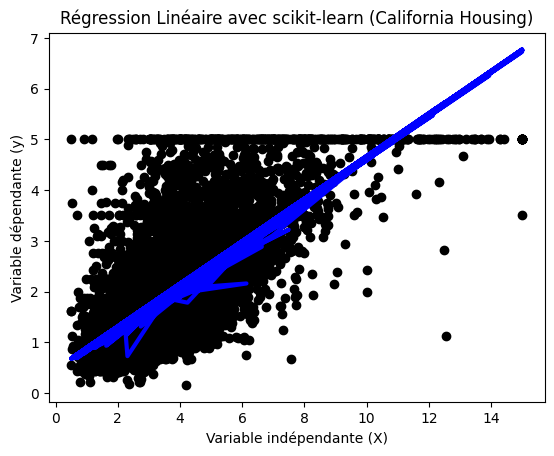

Erreur quadratique moyenne (MSE) : 0.7062088291776111
Coefficient de détermination (R²) : 0.4724687041738246


In [11]:
# Utilisation de seulement deux caractéristiques pour simplifier la visualisation
X = data[['MedInc','AveBedrms','Population','AveOccup']]
y = data['target'].values.reshape(-1, 1)

# Division des données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Création du modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Affichage des résultats
plt.scatter(X_test.iloc[:, 0], y_test, color='black')  # Utilisation de la première feature pour la visualisation
plt.plot(X_test.iloc[:, 0], y_pred, color='blue', linewidth=3)
plt.title('Régression Linéaire avec scikit-learn (California Housing)')
plt.xlabel('Variable indépendante (X)')
plt.ylabel('Variable dépendante (y)')
plt.show()

# Évaluation du modèle en utilisant l'erreur quadratique moyenne (MSE) et le coefficient de détermination (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Erreur quadratique moyenne (MSE) : {mse}')
print(f'Coefficient de détermination (R²) : {r2}')


#### A vous de jouer

Réaliser une régression linaire sur le jeu de données [load_diabetes](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes) de scikit-learn

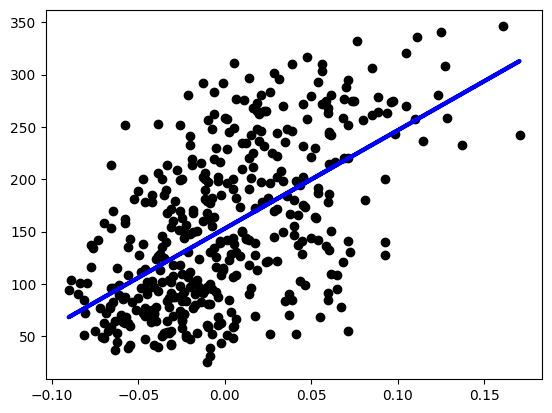

In [14]:
# Charge les données du dataset diabètes
diabetes_X, diabetes_Y = load_diabetes(return_X_y=True)

# Utilisé seulement une colonne
diabetes_X = diabetes_X[:, np.newaxis,2]

# Créer l'objet régression linéaire
regr = LinearRegression()

# Entraine le modèle en utilisant les jeux de données de tests
regr.fit(diabetes_X[:-20], diabetes_Y[:-20])

# Tracer les résultats
plt.scatter(diabetes_X[:-20], diabetes_Y[:-20], color="black")
plt.plot(diabetes_X[:-20], regr.predict(diabetes_X[:-20]), color="blue", linewidth=3)

plt.xticks()
plt.yticks()
plt.show()

### Classification

#### Regression logistique

In [18]:
# Utilisation de seulement deux caractéristiques pour simplifier la visualisation
X = data[['sepal length (cm)', 'sepal width (cm)']]
y = data['target'].values.reshape(-1, 1)

# Division des données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Création du modèle de régression logistique
model = LogisticRegression(max_iter=1000, random_state=42)

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Affichage des résultats
print("Accuracy:", accuracy)
print("\nMatrice de confusion:")
print(conf_matrix)
print("\nRapport de classification:")
print(classification_rep)

Accuracy: 0.85

Matrice de confusion:
[[23  0  0]
 [ 0 12  7]
 [ 0  2 16]]

Rapport de classification:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        23
         1.0       0.86      0.63      0.73        19
         2.0       0.70      0.89      0.78        18

    accuracy                           0.85        60
   macro avg       0.85      0.84      0.84        60
weighted avg       0.86      0.85      0.85        60



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Forêts aléatoire :

In [35]:
# Division des données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Création du modèle Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Affichage des résultats
print("Accuracy:", accuracy)
print("\nMatrice de confusion:")
print(conf_matrix)
print("\nRapport de classification:")
print(classification_rep)

<ipython-input-35-f13cb1ad9fc7>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Accuracy: 0.7666666666666667

Matrice de confusion:
[[23  0  0]
 [ 0 11  8]
 [ 0  6 12]]

Rapport de classification:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        23
         1.0       0.65      0.58      0.61        19
         2.0       0.60      0.67      0.63        18

    accuracy                           0.77        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.77      0.77      0.77        60



#### A vous de jouer

*  K-Nearest Neighbors (KNN):<br>
Description : Le K-Nearest Neighbors est un algorithme de classification basé sur la proximité. Il attribue une étiquette à une observation en se basant sur la majorité des étiquettes de ses k voisins les plus proches.<br>
Importation : from sklearn.neighbors import KNeighborsClassifier<br>
<br>


In [34]:
from sklearn.neighbors import KNeighborsClassifier

# Division des données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Création du modèle Random Forest
model = KNeighborsClassifier()

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Affichage des résultats
print("Accuracy:", accuracy)
print("\nMatrice de confusion:")
print(conf_matrix)
print("\nRapport de classification:")
print(classification_rep)

Accuracy: 0.8166666666666667

Matrice de confusion:
[[23  0  0]
 [ 0 12  7]
 [ 0  4 14]]

Rapport de classification:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        23
         1.0       0.75      0.63      0.69        19
         2.0       0.67      0.78      0.72        18

    accuracy                           0.82        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.82      0.82      0.82        60



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


*  Naive Bayes (GaussianNB):<br>
Description : Le Naive Bayes est un algorithme qui se base sur le théorème de Bayes avec l'hypothèse naïve d'indépendance conditionnelle entre chaque paire de caractéristiques.<br>
Importation : from sklearn.naive_bayes import GaussianNB<br>
<br>


In [32]:
from sklearn.naive_bayes import GaussianNB

# Division des données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Création du modèle Random Forest
model = GaussianNB()

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Affichage des résultats
print("Accuracy:", accuracy)
print("\nMatrice de confusion:")
print(conf_matrix)
print("\nRapport de classification:")
print(classification_rep)

Accuracy: 0.8333333333333334

Matrice de confusion:
[[23  0  0]
 [ 0 12  7]
 [ 0  3 15]]

Rapport de classification:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        23
         1.0       0.80      0.63      0.71        19
         2.0       0.68      0.83      0.75        18

    accuracy                           0.83        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.84      0.83      0.83        60



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*  Stochastic Gradient Descent (SGDClassifier):<br>
Description : La descente de gradient stochastique est une méthode d'optimisation utilisée pour entraîner des modèles linéaires et non linéaires, notamment dans le contexte de la classification.<br>
Importation : from sklearn.linear_model import SGDClassifier<br>
<br>


In [31]:
from sklearn.linear_model import SGDClassifier

# Division des données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Création du modèle Random Forest
model = SGDClassifier()


# Entraînement du modèle
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Affichage des résultats
print("Accuracy:", accuracy)
print("\nMatrice de confusion:")
print(conf_matrix)
print("\nRapport de classification:")
print(classification_rep)

Accuracy: 0.7

Matrice de confusion:
[[23  0  0]
 [ 0 19  0]
 [ 0 18  0]]

Rapport de classification:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        23
         1.0       0.51      1.00      0.68        19
         2.0       0.00      0.00      0.00        18

    accuracy                           0.70        60
   macro avg       0.50      0.67      0.56        60
weighted avg       0.55      0.70      0.60        60



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precisio

*  Decision Tree Classifier:<br>
Description : L'arbre de décision divise récursivement l'espace des caractéristiques en fonction des caractéristiques pour créer des sous-ensembles homogènes qui sont utilisés pour prendre des décisions.<br>
Importation : from sklearn.tree import DecisionTreeClassifier<br>
<br>


In [30]:
from sklearn.tree import DecisionTreeClassifier

# Division des données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Création du modèle Random Forest
model = DecisionTreeClassifier()


# Entraînement du modèle
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Affichage des résultats
print("Accuracy:", accuracy)
print("\nMatrice de confusion:")
print(conf_matrix)
print("\nRapport de classification:")
print(classification_rep)

Accuracy: 0.7333333333333333

Matrice de confusion:
[[22  1  0]
 [ 0 10  9]
 [ 0  6 12]]

Rapport de classification:
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        23
         1.0       0.59      0.53      0.56        19
         2.0       0.57      0.67      0.62        18

    accuracy                           0.73        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.74      0.73      0.74        60



Chacun de ces algorithmes a ses propres caractéristiques, et le choix dépend du type de données et du problème que vous essayez de résoudre. La documentation de scikit-learn donne plus d'informations sur chaque algorithme et ses paramètres.

## Machine learning non supervisé

In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

### Clustering

#### K-means

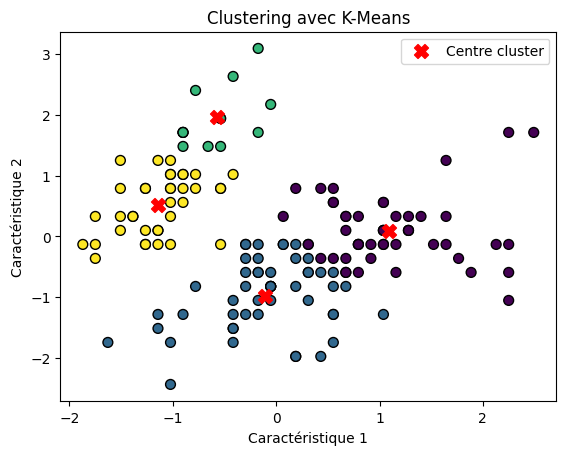

Score silhouette moyen : 0.4182834653796165


In [37]:
# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choisissez un nombre de clusters (k)
k = 4

# Application de l'algorithme K-Means avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=k, init='random', max_iter=300, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Ajout des étiquettes de cluster au DataFrame
data['cluster'] = labels

# Visualisation des clusters (en utilisant les deux premières caractéristiques pour la simplicité)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='X', label='Centre cluster')
plt.title('Clustering avec K-Means')
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')
plt.legend()
plt.show()

# Évaluation du modèle
silhouette_avg = silhouette_score(X_scaled, labels)
print(f'Score silhouette moyen : {silhouette_avg}')


#### A vous de jouer:

*   Hierarchical Clustering (Agglomerative Clustering):<br>
Description: Ce modèle construit une hiérarchie de clusters en fusionnant ou en coupant des clusters successifs.<br>
Importation : sklearn.cluster.AgglomerativeClustering<br>
<br>


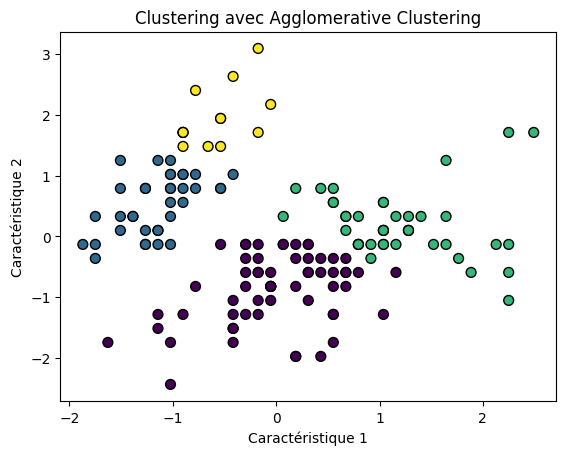

Score silhouette moyen : 0.42060555039994785


In [55]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assurez-vous que X est défini et contient vos données

# Choix du nombre de clusters (k)
k = 4

# Application de l'algorithme Agglomerative Clustering avec le nombre de clusters spécifié
agglomerative = AgglomerativeClustering(n_clusters=k)
labels = agglomerative.fit_predict(X_scaled)

# Ajout des étiquettes de cluster au DataFrame si nécessaire
# data['cluster'] = labels

# Visualisation des clusters (utilisant les deux premières caractéristiques pour la simplicité)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.title('Clustering avec Agglomerative Clustering')
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')
plt.show()

# Évaluation du modèle
silhouette_avg = silhouette_score(X_scaled, labels)
print(f'Score silhouette moyen : {silhouette_avg}')



*   DBSCAN (Density-Based Spatial Clustering of Applications with Noise):<br>
Description: DBSCAN est basé sur la densité et peut identifier des clusters de formes complexes en trouvant des régions denses de points dans l'espace des données.<br>
Importation : sklearn.cluster.DBSCAN<br>
<br>


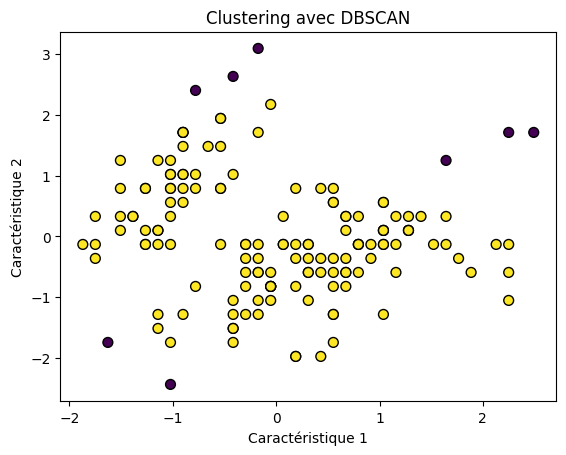

Score silhouette moyen : 0.391959020538701


In [52]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assurez-vous que X est défini et contient vos données

# Application de l'algorithme DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Spécifiez les valeurs pour eps et min_samples selon vos besoins
labels = dbscan.fit_predict(X_scaled)

# Visualisation des clusters (utilisant les deux premières caractéristiques pour la simplicité)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.title('Clustering avec DBSCAN')
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')
plt.show()

# Évaluation du modèle (score silhouette)
# Assurez-vous d'avoir suffisamment de clusters pour calculer le score silhouette
if len(set(labels)) > 1:
    silhouette_avg = silhouette_score(X_scaled, labels)
    print(f'Score silhouette moyen : {silhouette_avg}')
else:
    print("Impossible de calculer le score silhouette avec un seul cluster.")


*   Gaussian Mixture Model (GMM):<br>
Description: Les modèles de mélange gaussien modélisent les données comme un mélange de distributions gaussiennes. Ils peuvent modéliser des clusters avec différentes formes et tailles.<br>
Importation : sklearn.mixture.GaussianMixture

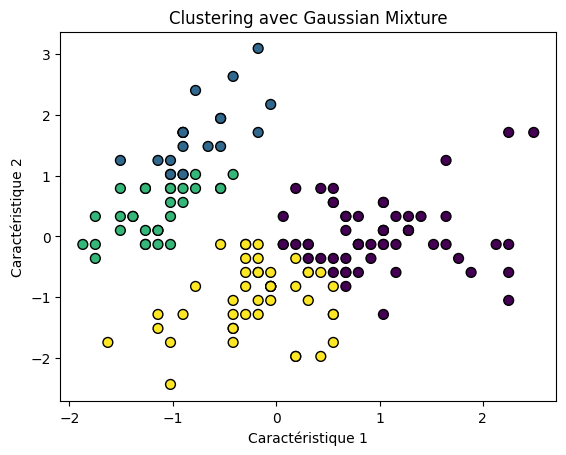

Score silhouette moyen : 0.38889915330642966


In [56]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assurez-vous que X est défini et contient vos données

# Application de l'algorithme Gaussian Mixture
gmm = GaussianMixture(n_components=4)  # Spécifiez le nombre de composants selon vos besoins
labels = gmm.fit_predict(X_scaled)

# Visualisation des clusters (utilisant les deux premières caractéristiques pour la simplicité)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.title('Clustering avec Gaussian Mixture')
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')
plt.show()

# Évaluation du modèle (score silhouette)
# Assurez-vous d'avoir suffisamment de clusters pour calculer le score silhouette
if len(set(labels)) > 1:
    silhouette_avg = silhouette_score(X_scaled, labels)
    print(f'Score silhouette moyen : {silhouette_avg}')
else:
    print("Impossible de calculer le score silhouette avec un seul cluster.")


### Régles d'association

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
# Création d'un ensemble de transactions (ex. achats d'un client)
transactions = [
    ['Lait', 'Oeufs', 'Pain'],
    ['Lait', 'Céréales'],
    ['Oeufs', 'Pain'],
    ['Lait', 'Céréales', 'Oeufs', 'Pain'],
    ['Céréales', 'Oeufs']
]

# Encodage des transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Application de l'algorithme Apriori
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)

# Affichage des itemsets fréquents
print("Itemsets fréquents :")
print(frequent_itemsets)

# Application de l'algorithme Association Rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Affichage des règles d'association
print("\nRègles d'association :")
print(rules)

# Encore des exercices

#### Exercice : Supervisé vs. Non supervisé
##### Contexte :
Vous travaillez pour une entreprise de commerce électronique qui souhaite améliorer la personnalisation des recommandations de produits pour ses utilisateurs. L'objectif est d'augmenter le taux de conversion et la satisfaction client en proposant des produits pertinents.

##### Données disponibles :
Vous avez accès à une grande base de données contenant l'historique des achats des utilisateurs, comprenant des informations sur les produits achetés, les catégories, les préférences et les avis.

##### Tâche :
Déterminez si la tâche est supervisée ou non supervisée. Justifiez votre réponse.

* Si supervisée, quel type de modèle utiliseriez-vous pour prédire les prochains achats d'un utilisateur ? Justifiez votre choix en fonction de la nature de la tâche.

* Si non supervisée, quel algorithme de clustering utiliseriez-vous pour regrouper les utilisateurs en fonction de leurs préférences d'achat ? Expliquez votre choix.<br>

Choisissez un ou deux autres cas d'utilisation potentiels pour lesquels vous pourriez également appliquer des techniques de machine learning supervisé ou non supervisé dans le domaine du commerce électronique. Justifiez brièvement votre choix pour chaque cas.

##### Instructions :
Considérez les avantages et les inconvénients des approches supervisée et non supervisée dans le contexte donné.
Expliquez comment l'utilisation d'un modèle ou d'un algorithme spécifique pourrait bénéficier à l'entreprise.
Indiquez toute considération éthique ou de confidentialité liée à l'utilisation de ces données.

#### Exercice : Prédiction de la Churn dans une Entreprise de Télécommunications
##### Contexte :
Vous travaillez pour une entreprise de télécommunications qui souhaite réduire le taux de désabonnement (churn) de ses clients. La direction veut anticiper quels clients sont les plus susceptibles de résilier leurs contrats afin de mettre en place des stratégies de rétention efficaces.

##### Données disponibles :
Vous disposez d'un ensemble de données comprenant des informations sur les clients, telles que la durée du contrat, le montant de la facture mensuelle, le nombre de services souscrits, la satisfaction client, etc. Chaque client est également étiqueté comme ayant résilié son contrat (1) ou non (0).

##### Tâche :
Déterminez si la tâche est supervisée ou non supervisée pour prédire le churn des clients. Justifiez votre réponse.

* Si supervisée, choisissez un modèle de régression logistique pour prédire le churn des clients en fonction des caractéristiques fournies. Justifiez votre choix en fonction de la nature de la tâche.

* Si non supervisée, proposez un algorithme de clustering qui pourrait être utilisé pour identifier des groupes de clients présentant des comportements similaires. Expliquez brièvement comment cet algorithme pourrait être utile dans ce contexte.

Écrivez un script Python utilisant scikit-learn pour entraîner le modèle de régression logistique (si la tâche est supervisée), ou appliquer l'algorithme de clustering (si la tâche est non supervisée).

##### Instructions :
Utilisez une approche de prétraitement des données pour gérer les valeurs manquantes ou les données qualitatives.
Utilisez les métriques appropriées pour évaluer la performance du modèle (si supervisé).
Choisissez judicieusement les caractéristiques à inclure dans votre modèle, en fonction de leur pertinence pour la prédiction du churn.